1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [21]:
from scipy import stats
import math

#calcolo la probabilità che in un singolo anno vengano osservati 15 o più uragani
#sapendo che il numero medio di uragani è 6.3 e il numero di uragani osservati è 15
probability = 1 - stats.poisson.cdf(14, 6.3)
print(f"Probability that in a single year are observed 15 or more hurricances: {probability}")

#calcolo lo Z score
z_score = (15 - 6.3 ) / math.sqrt(6.3) 
#print(z_score)

#confronto il punteggio Z con il valore fornito
if z_score >= 3:
    print("There is a significant difference between the number of hurricanes in 2005 and the historic average.")
else:
    print("There is no significant difference between the number of hurricanes in 2005 and the historic average.")

Probability that in a single year are observed 15 or more hurricances: 0.002217122790073134
There is a significant difference between the number of hurricanes in 2005 and the historic average.


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [22]:
import numpy as np

#dati
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

#calcolo delle statistiche necessarie per il test t di Student
n = len(pre)
mean_difference = np.mean(post) - np.mean(pre)
std_difference = np.sqrt(((n-1)*np.var(pre, ddof=1) + (n-1)*np.var(post, ddof=1)) / (2*n - 2))
t_statistic = mean_difference / (std_difference * np.sqrt(2/n))

#calcolo del p-value utilizzando la distribuzione t di Student
degrees_of_freedom = 2*n - 2
p_value = stats.t.cdf(t_statistic, n - 1) + (1.0 - stats.t.cdf(-t_statistic, n - 1))

# Stampa dei risultati
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

#se il valore di p è inferiore a un certo livello di significatività (standard value: 0.05), possiamo affermare che 
#il cambiamento della pressione sanguigna all'interno del nostro campione è statisticamente significativo 
#altrimenti no:
if p_value > 0.05:
    print("The change in blood pressures within our sample wasn't statistically significant")
else:
    print("The change in blood pressures within our sample statistically significant")


t-statistic: 3.786997938137629
p-value: 1.9956975358671354
The change in blood pressures within our sample wasn't statistically significant


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

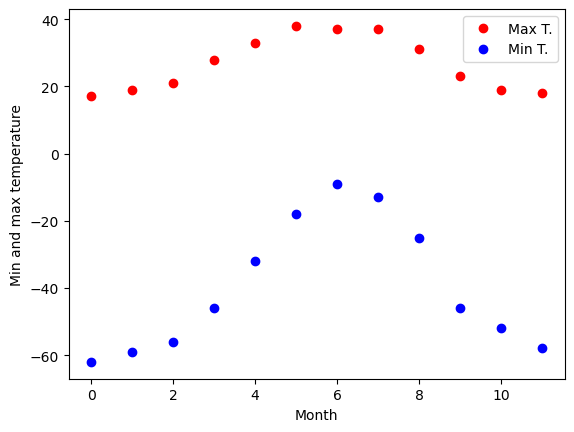

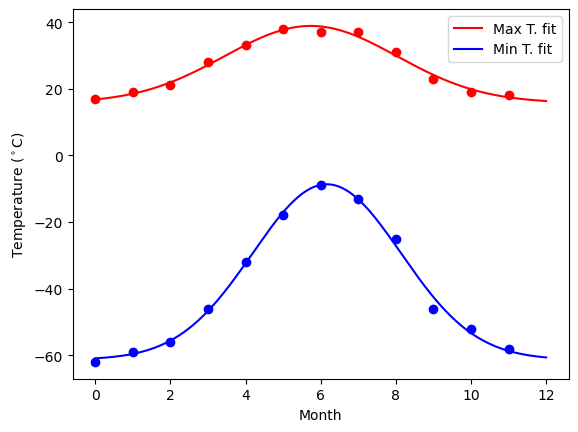

In [68]:
import matplotlib.pyplot as plt
from scipy import optimize

#DATI
temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]) #temp MAX
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]) #temp MIN
months = np.arange(12) #mesi


#------->1<-------
#plot delle temperature per ogni mese (MAX e MIN)
plt.plot(months, temp_max, 'ro', label="Max T.")
plt.plot(months, temp_min, 'bo', label="Min T.")
plt.xlabel('Month')
plt.ylabel('Min and max temperature')
plt.legend()


#------->2<-------
#fit the data
def gauss(x,ampl, mu, sigma, o):
    return ampl*np.exp(-(x-mu)**2/(2*sigma**2)) + o


#------->3<-------
res_max, cov_max = optimize.curve_fit(gauss, months, temp_max)
res_min, cov_min = optimize.curve_fit(gauss, months, temp_min,[50, 6, 1, -60])
 

#------->4<-------
#plot del fit
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, gauss(days, *res_max), 'r-', label="Max T. fit")
plt.plot(months, temp_min, 'bo')
plt.plot(days, gauss(days, *res_min), 'b-', label="Min T. fit")
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.show()

#Il fit è abbastanza ragionevole, guardando il grafico possiamo notare che il fit non si 
#discosta molto dai valori originali

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

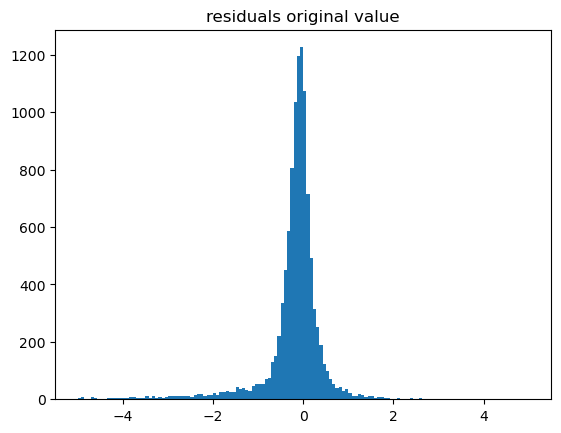

Sigma values: [ 2.23606798  2.82842712  1.41421356  1.41421356  3.          1.73205081
  1.41421356  1.41421356  1.41421356  2.23606798  2.23606798  2.44948974
  2.44948974  2.          2.          2.          2.82842712  3.
  2.44948974  2.44948974  2.23606798  3.16227766  2.23606798  3.16227766
  2.23606798  2.82842712  2.          2.82842712  3.31662479  3.16227766
  3.16227766  3.46410162  3.60555128  3.31662479  3.31662479  2.82842712
  4.          4.12310563  4.35889894  3.60555128  4.          3.87298335
  4.69041576  3.87298335  4.89897949  5.19615242  5.47722558  5.09901951
  5.          6.55743852  5.91607978  6.164414    5.65685425  5.47722558
  6.70820393  7.28010989  7.21110255  7.21110255  8.42614977  8.66025404
 11.35781669 12.20655562 14.79864859 18.33030278 21.26029163 24.18677324
 28.35489376 32.20248438 34.55430509 35.0142828  32.74141109 26.75817632
 22.18107301 17.74823935 15.8113883  13.74772708 11.04536102  9.94987437
  8.36660027  7.21110255  6.32455532  6.48074

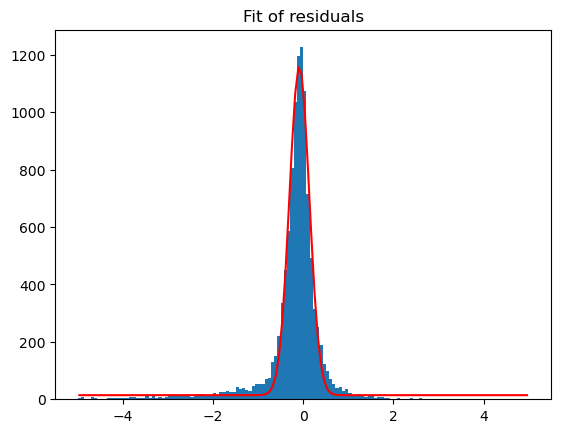

chi2 = 6089.25968926433
p-value = 0.0
The fit is considered unsatisfactor


In [67]:
import pandas as pd
import math
import statistics
from scipy.optimize import curve_fit

#leggo il file pkl
data = np.load('data/residuals_261.pkl', allow_pickle=True).item()
df = pd.DataFrame(data) #converto in un dataframe di pandas

#------->1<-------

#plot dell'istogramma, bin = 150
n,bins,_ = plt.hist(df["residuals"], bins = 140, range = (-5,5))
plt.title("residuals original value")
plt.show()

x = (bins[:-1] + bins[1:])*0.5

#------->2<-------
#calcolo di l'incertezza di Poisson
sigma_values = np.sqrt(np.abs(n))
print(f"Sigma values: {sigma_values}")

#------->3<-------
#definisco la funzione per il fit
def gauss(x,ampl, mu, sigma, o):
    return ampl*np.exp(-(x-mu)**2/(2*sigma**2)) + o

#calcolo i parametri iniziali
mu = statistics.mean(df["residuals"])
sigma = statistics.stdev(df["residuals"])

popt,pcov = optimize.curve_fit(gauss,x , n, [max(df["residuals"]),mu,sigma,0])

#fit con la funzione gaussiana
plt.hist(df["residuals"], bins = 140, range = (-5,5))
plt.plot(x, gauss(x, *popt), color ="red")
plt.title("Fit of residuals")
plt.show()


#------->4<-------
#bontà del fit

#imposto i gradi di libertà
ndof = len(x) - 1
func_fit = gauss(x, *popt)

#calcolo chi^2
chi2 = np.sum(((n - func_fit)**2) / sigma**2)
print("chi2 =", chi2)

#calcolo del p-value
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue)

if(pvalue< 0.05):
    print("The fit is considered unsatisfactor")
else:
    print("The fit is considered satisfactor")


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

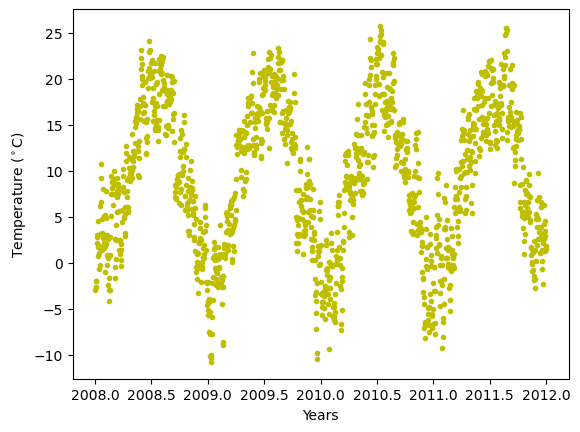

Theoric fit values (f function): a: 36.5, b: 6, c: 9.261252084167236
Best fit values (f function): a: -9.962034677755113, b: 6.048557550583868, c: 9.262821311801432


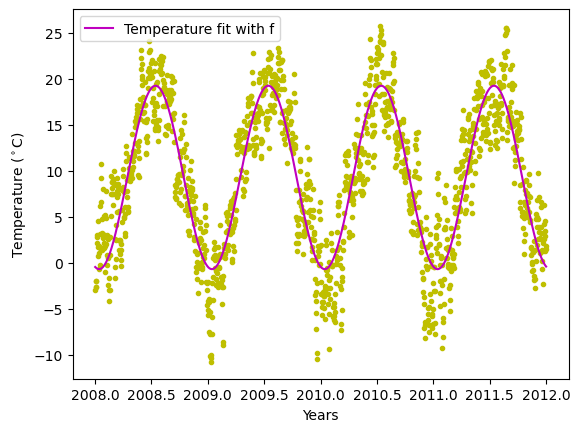

Average temperature in Munich: 9.261252084167236°C
Average temperature in hottest days: 24.907408333333336
Average temperature in coldest days: -9.777784

Best fit values (g function): a: -9.96073745879016, b: 1.0002935056299627, c: 8.624893737825511, d: 9.265675008839612


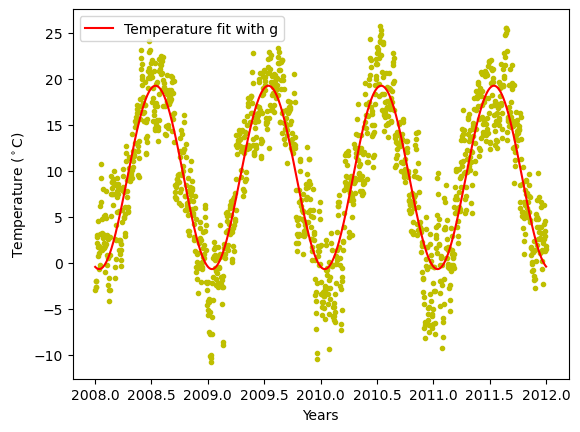

RSS of f(x): 18669.515394578368
RSS of g(x): 18669.225430551494
p-value: 0.881 , additional parameter necessary: NO


In [69]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

import matplotlib.pyplot as plt
from scipy import optimize


#leggo il datset
data = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt')
df = pd.DataFrame(data) #converto in un dataframe di pandas
df.columns = ["years", "temperatures"] #assegno il nome alle colonne

#seleziono gli anni compresi tra il 2008 e il 2012 ed elimino eventuali dati errati
range_df = df[(df["years"] > 2008) & (df["years"] < 2012)].reset_index()
range_df = range_df.drop(range_df[range_df["temperatures"] > 90.].index).reset_index()

#divido temperature e giorni
year = range_df["years"].copy()
temp = range_df["temperatures"].copy()

#utilizzo array numpy
temp_np = temp.to_numpy()
months_np = year.to_numpy()


#------->1<-------
#plot delle temperature e relativo fit

#dati orginali
plt.plot(months_np, temp_np, 'y.')
plt.xlabel('Years')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

#fit dei dati
def f(t, a, b, c):
    return a * np.cos( 2 * np.pi * t + b) + c

#valori del fit teorici: 
a = range_df["temperatures"].max() - range_df["temperatures"].min() #ampiezza
b = 6
c = range_df["temperatures"].mean() #valore medio
print(f"Theoric fit values (f function): a: {a}, b: {b}, c: {c}")

#ottimizazzione del fit e dei valori
res_max_f, cov_max = optimize.curve_fit(f, months_np, temp_np, [a,b,c])
print(f"Best fit values (f function): a: {res_max_f[0]}, b: {res_max_f[1]}, c: {res_max_f[2]}")

#plot del fit
plt.figure()
plt.plot(months_np, temp_np, 'y.')
plt.plot(months_np, f(months_np, *res_max_f), 'm-', label="Temperature fit with f")
plt.xlabel('Years')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.show()

#temperatura media
print(f"Average temperature in Munich: {c}\u00b0C")

hot_days = range_df.nlargest(12, "temperatures") #prendo alcuni dei valori dei giorni più caldi e faccio la media
mean_hot_days = np.mean(hot_days["temperatures"].to_numpy())
print(f"Average temperature in hottest days: {mean_hot_days}")

cold_days = range_df.nsmallest(10, "temperatures") #prendo alcuni dei valori dei giorni più calfreddi e faccio la media
mean_cold_days = np.mean(cold_days["temperatures"].to_numpy())
print(f"Average temperature in coldest days: {mean_cold_days}\n")

#Il parametro b è la variazione di fase del coseno, serve per inserire un corretto punto di partenza per la funzione.


#------->2<-------
#plot delle temperature e relativo fit con g(x)

#fit dei dati
def g(t, a, b, c, d):
    return a * np.cos( 2 * np.pi * t * b + c) + d

#ottimizazzione del fit e dei valori
res_max_g, cov_max = optimize.curve_fit(g, months_np, temp_np)
print(f"Best fit values (g function): a: {res_max_g[0]}, b: {res_max_g[1]}, c: {res_max_g[2]}, d: {res_max_g[3]}")

#plot del fit
plt.figure()
plt.plot(months_np, temp_np, 'y.')
plt.plot(months_np, g(months_np, *res_max_g), 'r-', label="Temperature fit with g")
plt.xlabel('Years')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.show()


# Calcolare il residuo quadratico medio
residuals_f = temp_np - f(months_np, *res_max_f)
rss_f = np.sum(residuals_f**2)
print(f"RSS of f(x): {rss_f}")

residuals_g = temp_np - g(months_np, *res_max_g)
rss_g = np.sum(residuals_g**2)
print(f"RSS of g(x): {rss_g}")


def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < 0.05 else "NO")
    return pval

fisher_test = Ftest(rss_f, rss_g, 3,4,len(months_np), True)
